# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [153]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [154]:
# Read your api key environment variable
# YOUR CODE HERE!
path="C:\\Users\\James McClure\\.env"
load_dotenv(dotenv_path=path)
api_key = os.getenv("news_api")
print(api_key)

497d123b68434da584c878cbabdb14c9


In [155]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [156]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_news_en = newsapi.get_everything(
    q="Bitcoin AND BTC",
    language="en"
)

# Show the total number of news
btc_news_en["totalResults"]

1336

In [157]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_news_en = newsapi.get_everything(
    q="Ethereum AND ETH",
    language="en"
)

# Show the total number of news
eth_news_en["totalResults"]

459

In [158]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
btc_sentiments = []

for article in btc_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "text": text,
            "token":""
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# # Reorder DataFrame columns
# cols = ["Compound", "Negative", "Neutral", "Positive", "text", "token"]
# btc_df = btc_df[cols]

btc_df.head()

,Compound,Negative,Neutral,Positive,text,token
0,0.5106,0.000,0.878,0.122,A ransomware variant called NetWalker is doing...,
1,-0.2677,0.074,0.881,0.045,An outspoken Bitcoin whale who rarely shows af...,
2,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,
3,0.7096,0.000,0.831,0.169,Seminal crypto-fund Grayscale Bitcoin BTC Trus...,
4,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,


In [159]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiments = []

for article in eth_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "text": text,
            "token":""
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# # Reorder DataFrame columns
# cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
# eth_df = eth_df[cols]

eth_df.head()

,Compound,Negative,Neutral,Positive,text,token
0,0.2484,0.000,0.943,0.057,Ethereum is one of the most growing cryptocurr...,
1,-0.2732,0.052,0.948,0.000,"On Aug. 2, the price of Ethereum peaked at $41...",
2,0.0000,0.000,1.000,0.000,Ethereum 2.0s final and official public testne...,
3,0.4404,0.000,0.906,0.094,"Though now evolved in many ways, Gavin Wood wr...",
4,0.6486,0.000,0.858,0.142,Hopes the bottleneck on the Ethereum blockchai...,


In [160]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.487265,0.003700,0.899850,0.096450
std,0.186891,0.016547,0.022958,0.025574
min,-0.267700,0.000000,0.831000,0.045000
25%,0.507000,0.000000,0.910000,0.090000
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.000000,0.910000,0.090000
max,0.709600,0.074000,0.910000,0.169000


In [161]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,20.00000,20.000000,20.000000,20.000000
mean,0.15595,0.021650,0.926700,0.051600
std,0.34905,0.047398,0.076306,0.056516
min,-0.59940,0.000000,0.749000,0.000000
25%,0.00000,0.000000,0.899750,0.000000
50%,0.08895,0.000000,0.937000,0.052500
75%,0.44040,0.008750,1.000000,0.080000
max,0.77170,0.189000,1.000000,0.165000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [162]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to C:\Users\James
[nltk_data]     McClure\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\James
[nltk_data]     McClure\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [163]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addon = {'fucking'}

In [164]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    #remove punctuation
    no_punks = re.compile("[^a-zA-Z ]")
    clean = no_punks.sub('', text)
    # Create a list of the words
    words = word_tokenize(clean)
    # Remove the stop words
    sw = set(stopwords.words('english'))
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    return tokens

In [165]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
all_btc_words = []
for i in btc_df.index:
    token = tokenizer(btc_df['text'][i])
    btc_df['token'][i] = token
    for bit in token:
        all_btc_words.append(bit)
btc_df.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Compound,Negative,Neutral,Positive,text,token
0,0.5106,0.000,0.878,0.122,A ransomware variant called NetWalker is doing...,"[ransomware, variant, called, netwalker, surpr..."
1,-0.2677,0.074,0.881,0.045,An outspoken Bitcoin whale who rarely shows af...,"[outspoken, bitcoin, whale, rarely, show, affe..."
2,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
3,0.7096,0.000,0.831,0.169,Seminal crypto-fund Grayscale Bitcoin BTC Trus...,"[seminal, cryptofund, grayscale, bitcoin, btc,..."
4,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [166]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
all_eth_words = []
for i in eth_df.index:
    token = tokenizer(eth_df['text'][i])
    eth_df['token'][i] = token
    for bit in token:
        all_eth_words.append(bit)
eth_df.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Compound,Negative,Neutral,Positive,text,token
0,0.2484,0.000,0.943,0.057,Ethereum is one of the most growing cryptocurr...,"[ethereum, one, growing, cryptocurrencies, rec..."
1,-0.2732,0.052,0.948,0.000,"On Aug. 2, the price of Ethereum peaked at $41...","[aug, price, ethereum, peaked, within, minute,..."
2,0.0000,0.000,1.000,0.000,Ethereum 2.0s final and official public testne...,"[ethereum, final, official, public, testnet, m..."
3,0.4404,0.000,0.906,0.094,"Though now evolved in many ways, Gavin Wood wr...","[though, evolved, many, way, gavin, wood, wrot..."
4,0.6486,0.000,0.858,0.142,Hopes the bottleneck on the Ethereum blockchai...,"[hopes, bottleneck, ethereum, blockchain, migh..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [167]:
from collections import Counter
from nltk import ngrams

In [168]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
#create a word list for all articles
btc_counts = Counter(ngrams(all_btc_words, n=2))
print(dict(btc_counts.most_common(10)))

{('satoshi', 'nakaboto'): 32, ('bitcoin', 'btc'): 17, ('char', 'robot'): 16, ('robot', 'colleague'): 16, ('colleague', 'satoshi'): 16, ('nakaboto', 'writes'): 16, ('writes', 'bitcoin'): 16, ('btc', 'every'): 16, ('every', 'daywelcome'): 16, ('daywelcome', 'another'): 16}


In [169]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_counts = Counter(ngrams(all_eth_words, n=2))
print(dict(eth_counts.most_common(10)))

{('btc', 'trading'): 4, ('trading', 'around'): 4, ('char', 'ethereum'): 3, ('recent', 'time'): 2, ('launch', 'eth'): 2, ('decentralized', 'exchange'): 2, ('char', 'bitcoins'): 2, ('bitcoins', 'price'): 2, ('fee', 'ethereum'): 2, ('around', 'char'): 2}


In [170]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [171]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
top_btc = token_count(all_btc_words)

In [172]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
top_eth = token_count(all_eth_words)

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [173]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

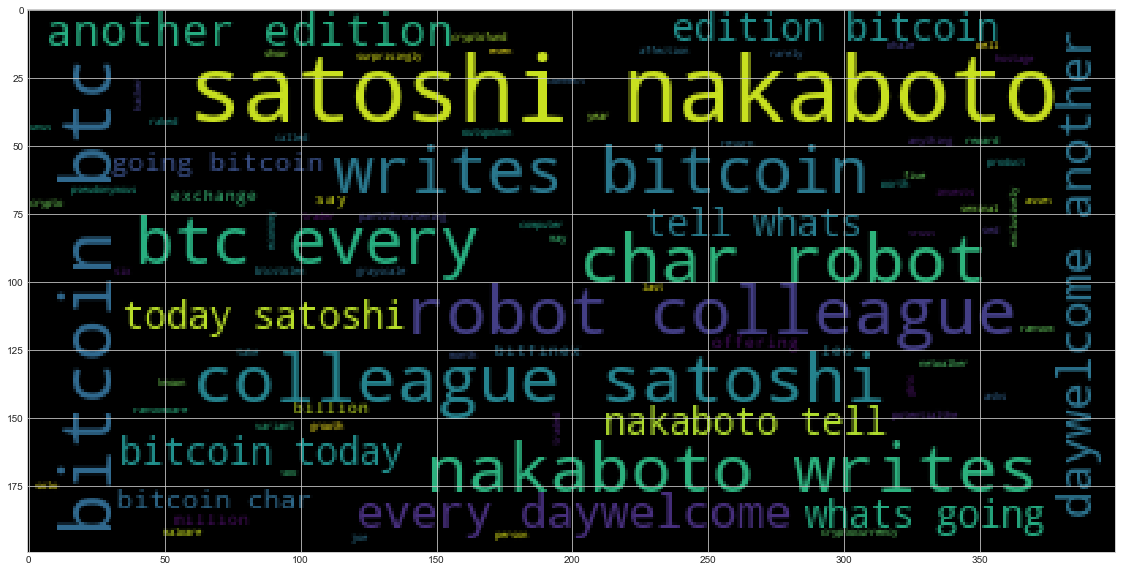

In [174]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
cloud_btc = ' '.join(all_btc_words)
wc = WordCloud().generate(cloud_btc)
plt.imshow(wc)

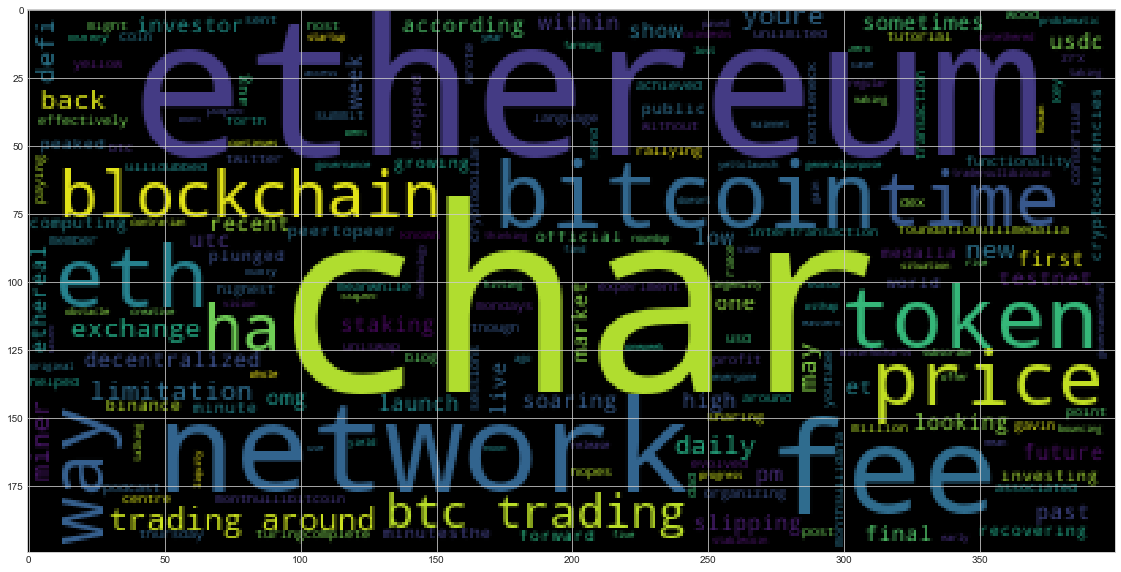

In [175]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
cloud_eth = ' '.join(all_eth_words)
wc = WordCloud().generate(cloud_eth)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [176]:
import spacy
from spacy import displacy

In [177]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [178]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [179]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
concat_btc = ""
for word in all_btc_words:
    concat_btc += word + " "

In [180]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(concat_btc)
# Add a title to the document
# YOUR CODE HERE!

In [181]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [182]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

['bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin']


---

## Ethereum NER

In [183]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
concat_eth = ""
for word in all_eth_words:
    concat_eth += word + " "

In [184]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(concat_eth)
# Add a title to the document
# YOUR CODE HERE!


In [185]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [186]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

['russia']
